In [4]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import load_dataset
import json

In [5]:
#with open('data/dados_discentes.json', 'r') as f:
f = open('discentes.json',encoding = "utf8")
data = json.load(f)
data

[{'itens': [{'valor': 'Câmpus Águas Lindas'},
   {'valor': '2014'},
   {'valor': '1'},
   {'valor': 'Técnico Integrado ao Ensino Médio em Enfermagem na Modalidade de Educação de Jovens e Adultos'},
   {'valor': 'Integrado - EJA'},
   {'valor': 'Presencial'},
   {'valor': 'M'},
   {'valor': 'Ensino Médio'},
   {'valor': '1 Sm < Rfp <= 1,5 Sm'},
   {'valor': 'Preta'},
   {'valor': '1979'},
   {'valor': 'Concluído'}]},
 {'itens': [{'valor': 'Câmpus Águas Lindas'},
   {'valor': '2014'},
   {'valor': '1'},
   {'valor': 'Técnico Integrado ao Ensino Médio em Enfermagem na Modalidade de Educação de Jovens e Adultos'},
   {'valor': 'Integrado - EJA'},
   {'valor': 'Presencial'},
   {'valor': 'F'},
   {'valor': 'Ensino Médio'},
   {'valor': '1,5 Sm < Rfp <= 2,5 Sm'},
   {'valor': 'Parda'},
   {'valor': '1985'},
   {'valor': 'Concludente'}]},
 {'itens': [{'valor': 'Câmpus Águas Lindas'},
   {'valor': '2014'},
   {'valor': '1'},
   {'valor': 'Técnico Integrado ao Ensino Médio em Enfermagem na Moda

In [6]:
df = {
    'campus': [],
    'ano': [],
    'semestre': [],
    'curso': [],
    'tipo_curso': [],
    'modalidade': [],
    'sexo': [],
    'escolaridade': [],
    'algo': [],
    'cor': [],
    'nascimento': [],
    'status': []
}

for itens in data:
    item = itens['itens']
    df['campus'].append(item[0]['valor'])
    df['ano'].append(item[1]['valor'])
    df['semestre'].append(item[2]['valor'])
    df['curso'].append(item[3]['valor'])
    df['tipo_curso'].append(item[4]['valor'])
    df['modalidade'].append(item[5]['valor'])
    df['sexo'].append(item[6]['valor'])
    df['escolaridade'].append(item[7]['valor'])
    df['algo'].append(item[8]['valor'])
    df['cor'].append(item[9]['valor'])
    df['nascimento'].append(item[10]['valor'])
    df['status'].append(item[11]['valor'])

df

{'campus': ['Câmpus Águas Lindas',
  'Câmpus Águas Lindas',
  'Câmpus Águas Lindas',
  'Câmpus Águas Lindas',
  'Câmpus Águas Lindas',
  'Câmpus Águas Lindas',
  'Câmpus Águas Lindas',
  'Câmpus Águas Lindas',
  'Câmpus Águas Lindas',
  'Câmpus Águas Lindas',
  'Câmpus Águas Lindas',
  'Câmpus Águas Lindas',
  'Câmpus Águas Lindas',
  'Câmpus Águas Lindas',
  'Câmpus Águas Lindas',
  'Câmpus Águas Lindas',
  'Câmpus Águas Lindas',
  'Câmpus Águas Lindas',
  'Câmpus Águas Lindas',
  'Câmpus Águas Lindas',
  'Câmpus Águas Lindas',
  'Câmpus Águas Lindas',
  'Câmpus Águas Lindas',
  'Câmpus Águas Lindas',
  'Câmpus Águas Lindas',
  'Câmpus Águas Lindas',
  'Câmpus Águas Lindas',
  'Câmpus Águas Lindas',
  'Câmpus Águas Lindas',
  'Câmpus Águas Lindas',
  'Câmpus Águas Lindas',
  'Câmpus Águas Lindas',
  'Câmpus Águas Lindas',
  'Câmpus Águas Lindas',
  'Câmpus Águas Lindas',
  'Câmpus Águas Lindas',
  'Câmpus Águas Lindas',
  'Câmpus Águas Lindas',
  'Câmpus Águas Lindas',
  'Câmpus Águas

In [7]:
df = pd.DataFrame(df)

In [8]:
df

,campus,ano,semestre,curso,tipo_curso,modalidade,sexo,escolaridade,algo,cor,nascimento,status
0,Câmpus Águas Lindas,2014,1,Técnico Integrado ao Ensino Médio em Enfermage...,Integrado - EJA,Presencial,M,Ensino Médio,"1 Sm < Rfp <= 1,5 Sm",Preta,1979,Concluído
1,Câmpus Águas Lindas,2014,1,Técnico Integrado ao Ensino Médio em Enfermage...,Integrado - EJA,Presencial,F,Ensino Médio,"1,5 Sm < Rfp <= 2,5 Sm",Parda,1985,Concludente
2,Câmpus Águas Lindas,2014,1,Técnico Integrado ao Ensino Médio em Enfermage...,Integrado - EJA,Presencial,F,Ensino Médio,"1,5 Sm < Rfp <= 2,5 Sm",Parda,1980,Concluído
3,Câmpus Águas Lindas,2014,1,Técnico Integrado ao Ensino Médio em Enfermage...,Integrado - EJA,Presencial,F,Ensino Médio,Não Informado,Não dispõe da informação,1989,Evasão
4,Câmpus Águas Lindas,2014,1,Técnico Integrado ao Ensino Médio em Enfermage...,Integrado - EJA,Presencial,F,Ensino Médio,"1,5 Sm < Rfp <= 2,5 Sm",Parda,1981,Concluído
...,...,...,...,...,...,...,...,...,...,...,...,...
63723,Polo Valparaíso de Goiás,2015,2,Curso Técnico Subsequente ao Ensino Médio em S...,Subsequente,À Distância,F,Ensino Médio,"2,5 Sm < Rfp <= 3 Sm",Branca,1974,Evasão
63724,Polo Valparaíso de Goiás,2015,2,Curso Técnico Subsequente ao Ensino Médio em S...,Subsequente,À Distância,F,Ensino Médio,"0,5 Sm < Rfp <= 1 Sm",Parda,1988,Evasão
63725,Polo Valparaíso de Goiás,2015,2,Curso Técnico Subsequente ao Ensino Médio em S...,Subsequente,À Distância,F,Ensino Médio,"1 Sm < Rfp <= 1,5 Sm",Preta,1988,Evasão
63726,Polo Valparaíso de Goiás,2015,2,Curso Técnico Subsequente ao Ensino Médio em S...,Subsequente,À Distância,M,Ensino Médio,"1 Sm < Rfp <= 1,5 Sm",Parda,1986,Evasão


In [6]:
# for col in df.columns:
#     print(df[[col]].groupby([col]).sum())

# não tem valores nulos

In [7]:
numericos = ['ano', 'semestre', 'nascimento']

df[numericos] = df[numericos].astype(int)

df.info()
df


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63635 entries, 0 to 63634
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   campus        63635 non-null  object
 1   ano           63635 non-null  int32 
 2   semestre      63635 non-null  int32 
 3   curso         63635 non-null  object
 4   tipo_curso    63635 non-null  object
 5   modalidade    63635 non-null  object
 6   sexo          63635 non-null  object
 7   escolaridade  63635 non-null  object
 8   algo          63635 non-null  object
 9   cor           63635 non-null  object
 10  nascimento    63635 non-null  int32 
 11  status        63635 non-null  object
dtypes: int32(3), object(9)
memory usage: 5.1+ MB


,campus,ano,semestre,curso,tipo_curso,modalidade,sexo,escolaridade,algo,cor,nascimento,status
0,Câmpus Águas Lindas,2014,1,Técnico Integrado ao Ensino Médio em Enfermage...,Integrado - EJA,Presencial,M,Ensino Médio,"1 Sm < Rfp <= 1,5 Sm",Preta,1979,Concluído
1,Câmpus Águas Lindas,2014,1,Técnico Integrado ao Ensino Médio em Enfermage...,Integrado - EJA,Presencial,F,Ensino Médio,"1,5 Sm < Rfp <= 2,5 Sm",Parda,1985,Concludente
2,Câmpus Águas Lindas,2014,1,Técnico Integrado ao Ensino Médio em Enfermage...,Integrado - EJA,Presencial,F,Ensino Médio,"1,5 Sm < Rfp <= 2,5 Sm",Parda,1980,Concluído
3,Câmpus Águas Lindas,2014,1,Técnico Integrado ao Ensino Médio em Enfermage...,Integrado - EJA,Presencial,F,Ensino Médio,Não Informado,Não dispõe da informação,1989,Evasão
4,Câmpus Águas Lindas,2014,1,Técnico Integrado ao Ensino Médio em Enfermage...,Integrado - EJA,Presencial,F,Ensino Médio,"1,5 Sm < Rfp <= 2,5 Sm",Parda,1981,Concluído
...,...,...,...,...,...,...,...,...,...,...,...,...
63630,Polo Valparaíso de Goiás,2015,2,Curso Técnico Subsequente ao Ensino Médio em S...,Subsequente,À Distância,F,Ensino Médio,"0,5 Sm < Rfp <= 1 Sm",Parda,1988,Evasão
63631,Polo Valparaíso de Goiás,2015,2,Curso Técnico Subsequente ao Ensino Médio em S...,Subsequente,À Distância,F,Ensino Médio,"1 Sm < Rfp <= 1,5 Sm",Preta,1988,Evasão
63632,Polo Valparaíso de Goiás,2015,2,Curso Técnico Subsequente ao Ensino Médio em S...,Subsequente,À Distância,M,Ensino Médio,"1 Sm < Rfp <= 1,5 Sm",Parda,1986,Evasão
63633,Polo Valparaíso de Goiás,2015,2,Curso Técnico Subsequente ao Ensino Médio em S...,Subsequente,À Distância,M,Ensino Médio,"0,5 Sm < Rfp <= 1 Sm",Parda,1988,Evasão


In [8]:
categoricos = [col for col in df.columns if col not in numericos]

df_posprocessing = df.copy()
df_posprocessing = df_posprocessing.drop(columns=categoricos)

ohc = pd.get_dummies(df[categoricos])

df_posprocessing[ohc.columns] = ohc
df_posprocessing

C:\Users\mateu\AppData\Local\Temp\ipykernel_12024\521115618.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_posprocessing[ohc.columns] = ohc
C:\Users\mateu\AppData\Local\Temp\ipykernel_12024\521115618.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_posprocessing[ohc.columns] = ohc
C:\Users\mateu\AppData\Local\Temp\ipykernel_12024\521115618.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all colu

C:\Users\mateu\AppData\Local\Temp\ipykernel_12024\521115618.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_posprocessing[ohc.columns] = ohc
C:\Users\mateu\AppData\Local\Temp\ipykernel_12024\521115618.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_posprocessing[ohc.columns] = ohc
C:\Users\mateu\AppData\Local\Temp\ipykernel_12024\521115618.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all colu

C:\Users\mateu\AppData\Local\Temp\ipykernel_12024\521115618.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_posprocessing[ohc.columns] = ohc
C:\Users\mateu\AppData\Local\Temp\ipykernel_12024\521115618.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_posprocessing[ohc.columns] = ohc
C:\Users\mateu\AppData\Local\Temp\ipykernel_12024\521115618.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all colu

C:\Users\mateu\AppData\Local\Temp\ipykernel_12024\521115618.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_posprocessing[ohc.columns] = ohc
C:\Users\mateu\AppData\Local\Temp\ipykernel_12024\521115618.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_posprocessing[ohc.columns] = ohc
C:\Users\mateu\AppData\Local\Temp\ipykernel_12024\521115618.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all colu

C:\Users\mateu\AppData\Local\Temp\ipykernel_12024\521115618.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_posprocessing[ohc.columns] = ohc
C:\Users\mateu\AppData\Local\Temp\ipykernel_12024\521115618.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_posprocessing[ohc.columns] = ohc
C:\Users\mateu\AppData\Local\Temp\ipykernel_12024\521115618.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all colu

C:\Users\mateu\AppData\Local\Temp\ipykernel_12024\521115618.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_posprocessing[ohc.columns] = ohc
C:\Users\mateu\AppData\Local\Temp\ipykernel_12024\521115618.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_posprocessing[ohc.columns] = ohc
C:\Users\mateu\AppData\Local\Temp\ipykernel_12024\521115618.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all colu

,ano,semestre,nascimento,campus_Câmpus Anápolis,campus_Câmpus Aparecida de Goiânia,campus_Câmpus Cidade de Goiás,campus_Câmpus Formosa,campus_Câmpus Goiânia,campus_Câmpus Goiânia Oeste,campus_Câmpus Inhumas,...,status_Falecido,status_Formado,status_Jubilado,status_Matriculado,status_Matrícula Vínculo Institucional,status_Não Concluído,status_Projeto Final (Concludente),status_Trancado,status_Transferido Externo,status_Transferido Interno
0,2014,1,1979,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2014,1,1985,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2014,1,1980,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2014,1,1989,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2014,1,1981,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63630,2015,2,1988,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63631,2015,2,1988,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63632,2015,2,1986,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63633,2015,2,1988,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
for col in df_posprocessing:
    print(col)

ano
semestre
nascimento
campus_Câmpus Anápolis
campus_Câmpus Aparecida de Goiânia
campus_Câmpus Cidade de Goiás
campus_Câmpus Formosa
campus_Câmpus Goiânia
campus_Câmpus Goiânia Oeste
campus_Câmpus Inhumas
campus_Câmpus Itumbiara
campus_Câmpus Jataí
campus_Câmpus Luziânia
campus_Câmpus Senador Canedo
campus_Câmpus Uruaçu
campus_Câmpus Valparaíso
campus_Câmpus Virtual de Ead
campus_Câmpus Águas Lindas
campus_Polo Anápolis
campus_Polo Aparecida de Goiânia
campus_Polo Catalão
campus_Polo Cidade de Goiás
campus_Polo Formosa
campus_Polo Goianésia
campus_Polo Goiânia
campus_Polo Goiânia Oeste
campus_Polo Inhumas
campus_Polo Itumbiara
campus_Polo Jatai
campus_Polo Luziânia
campus_Polo Senador Canedo
campus_Polo Uruaçu
campus_Polo Valparaíso de Goiás
campus_Polo Águas Lindas de Goiás
curso_Alunos Especiais - Mestrado - Câmpus Anápolis
curso_Alunos Especiais - Mestrado - Câmpus Aparecida
curso_Alunos Especiais - Mestrado - Câmpus Goiânia
curso_Alunos Especiais - Mestrado - Câmpus Jataí
curso_Ba

In [10]:
df_posprocessing[['semestre']].describe()

,semestre
count,63635.000000
mean,1.290045
std,0.455066
min,0.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,2.000000


In [11]:
for col in numericos:
    df_posprocessing[col] = (df_posprocessing[col] - df_posprocessing[col].min()) / (df_posprocessing[col].max() - df_posprocessing[col].min())

In [12]:
df_posprocessing[numericos]

,ano,semestre,nascimento
0,0.428571,0.5,0.014911
1,0.428571,0.5,0.016044
2,0.428571,0.5,0.015100
3,0.428571,0.5,0.016799
4,0.428571,0.5,0.015289
...,...,...,...
63630,0.500000,1.0,0.016610
63631,0.500000,1.0,0.016610
63632,0.500000,1.0,0.016233
63633,0.500000,1.0,0.016610


In [13]:
df_posprocessing.corr()['status_Não Concluído']

ano                                   0.019970
semestre                              0.033882
nascimento                           -0.001400
campus_Câmpus Anápolis               -0.005872
campus_Câmpus Aparecida de Goiânia   -0.004405
                                        ...   
status_Não Concluído                  1.000000
status_Projeto Final (Concludente)   -0.000662
status_Trancado                      -0.004964
status_Transferido Externo           -0.004678
status_Transferido Interno           -0.001937
Name: status_Não Concluído, Length: 245, dtype: float64

In [14]:
df

,campus,ano,semestre,curso,tipo_curso,modalidade,sexo,escolaridade,algo,cor,nascimento,status
0,Câmpus Águas Lindas,2014,1,Técnico Integrado ao Ensino Médio em Enfermage...,Integrado - EJA,Presencial,M,Ensino Médio,"1 Sm < Rfp <= 1,5 Sm",Preta,1979,Concluído
1,Câmpus Águas Lindas,2014,1,Técnico Integrado ao Ensino Médio em Enfermage...,Integrado - EJA,Presencial,F,Ensino Médio,"1,5 Sm < Rfp <= 2,5 Sm",Parda,1985,Concludente
2,Câmpus Águas Lindas,2014,1,Técnico Integrado ao Ensino Médio em Enfermage...,Integrado - EJA,Presencial,F,Ensino Médio,"1,5 Sm < Rfp <= 2,5 Sm",Parda,1980,Concluído
3,Câmpus Águas Lindas,2014,1,Técnico Integrado ao Ensino Médio em Enfermage...,Integrado - EJA,Presencial,F,Ensino Médio,Não Informado,Não dispõe da informação,1989,Evasão
4,Câmpus Águas Lindas,2014,1,Técnico Integrado ao Ensino Médio em Enfermage...,Integrado - EJA,Presencial,F,Ensino Médio,"1,5 Sm < Rfp <= 2,5 Sm",Parda,1981,Concluído
...,...,...,...,...,...,...,...,...,...,...,...,...
63630,Polo Valparaíso de Goiás,2015,2,Curso Técnico Subsequente ao Ensino Médio em S...,Subsequente,À Distância,F,Ensino Médio,"0,5 Sm < Rfp <= 1 Sm",Parda,1988,Evasão
63631,Polo Valparaíso de Goiás,2015,2,Curso Técnico Subsequente ao Ensino Médio em S...,Subsequente,À Distância,F,Ensino Médio,"1 Sm < Rfp <= 1,5 Sm",Preta,1988,Evasão
63632,Polo Valparaíso de Goiás,2015,2,Curso Técnico Subsequente ao Ensino Médio em S...,Subsequente,À Distância,M,Ensino Médio,"1 Sm < Rfp <= 1,5 Sm",Parda,1986,Evasão
63633,Polo Valparaíso de Goiás,2015,2,Curso Técnico Subsequente ao Ensino Médio em S...,Subsequente,À Distância,M,Ensino Médio,"0,5 Sm < Rfp <= 1 Sm",Parda,1988,Evasão


C:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='campus', ylabel='count'>

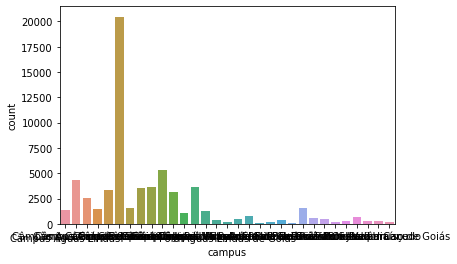

In [15]:
sns.countplot(df['campus'])


C:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='semestre', ylabel='count'>

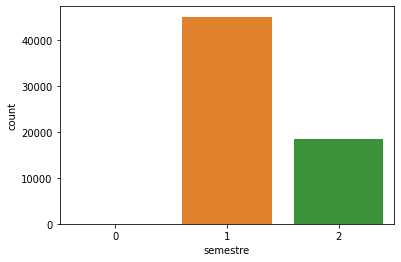

In [18]:
sns.countplot(df['semestre'])

C:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='tipo_curso', ylabel='count'>

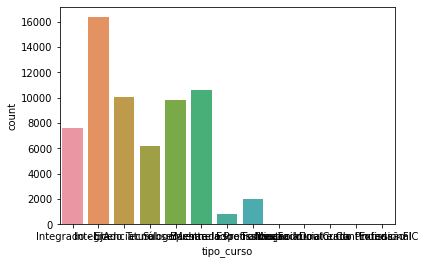

In [22]:
sns.countplot(df['tipo_curso']) #modalidade

C:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='modalidade', ylabel='count'>

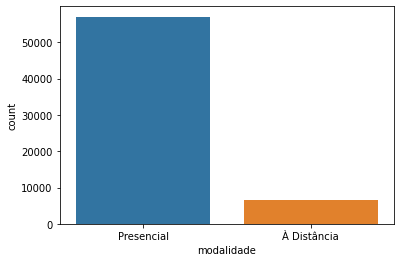

In [20]:
sns.countplot(df['modalidade']) # se presencial ou distancia

C:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sexo', ylabel='count'>

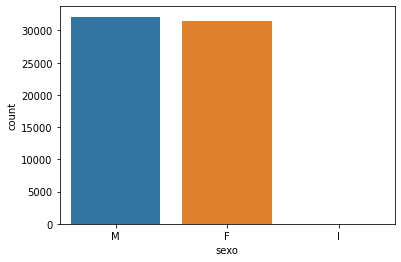

In [23]:
sns.countplot(df['sexo'])

C:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='escolaridade', ylabel='count'>

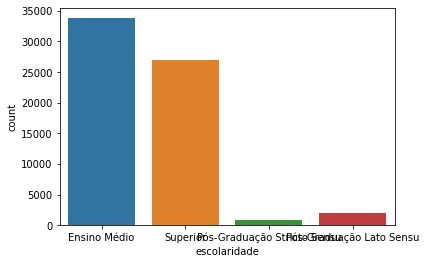

In [25]:
sns.countplot(df['escolaridade'])

C:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='algo', ylabel='count'>

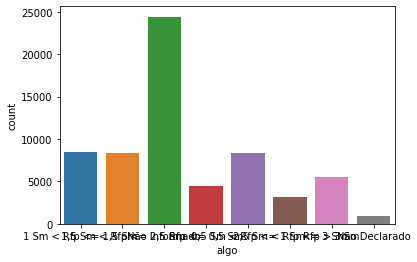

In [26]:
sns.countplot(df['algo'])

C:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cor', ylabel='count'>

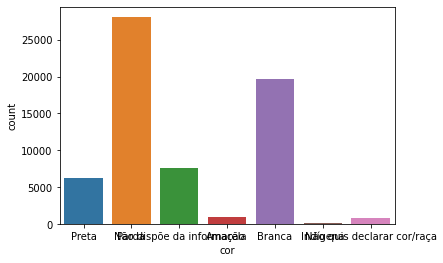

In [28]:
sns.countplot(df['cor'])

C:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='status', ylabel='count'>

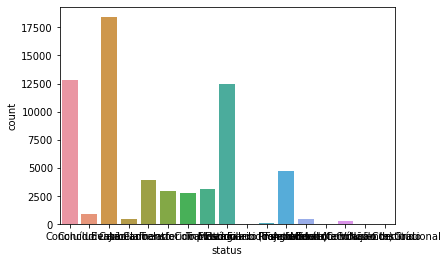

In [32]:
sns.countplot(df['status']) #situacao em que se encontra

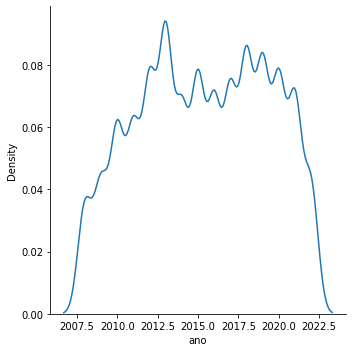

In [40]:
sns.displot(df['ano'],kind = 'kde')

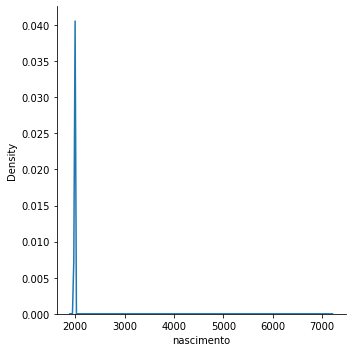

In [41]:
sns.displot(df['nascimento'], kind = 'kde')

In [80]:
#df['nacimento']
#df1 = df.query("nascimento < 1970 & nascimento > 2010")
df1 = df[df['nascimento']<=2010]

In [55]:
df1.count()

campus          29
ano             29
semestre        29
curso           29
tipo_curso      29
modalidade      29
sexo            29
escolaridade    29
algo            29
cor             29
nascimento      29
status          29
dtype: int64

In [65]:
#df.sort_values(by=['curso'])['curso'].nunique()
df.groupby('curso')['curso'].nunique() # alunos especiais não é um curso, inconsistência

curso
Alunos Especiais - Mestrado - Câmpus Anápolis          1
Alunos Especiais - Mestrado - Câmpus Aparecida         1
Alunos Especiais - Mestrado - Câmpus Goiânia           1
Alunos Especiais - Mestrado - Câmpus Jataí             1
Bacharelado em Agronomia                               1
                                                      ..
Técnico Subsequente ao Ensino Médio em Mecânica        1
Técnico Subsequente ao Ensino Médio em Mineração       1
Técnico Subsequente em Agrimensura                     1
Técnico Subsequente em Eletrotécnica                   1
Técnico em Informática para Internet - Concomitante    1
Name: curso, Length: 157, dtype: int64

C:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


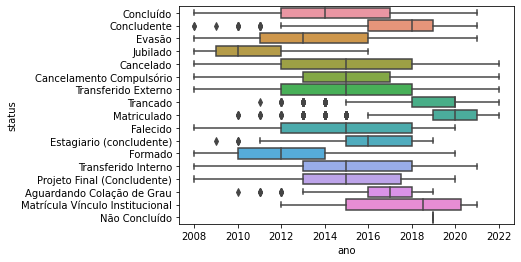

In [75]:
sns.boxplot(df['ano'],df['status']) # 11 e 1
plt.show()

C:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='nascimento', ylabel='status'>

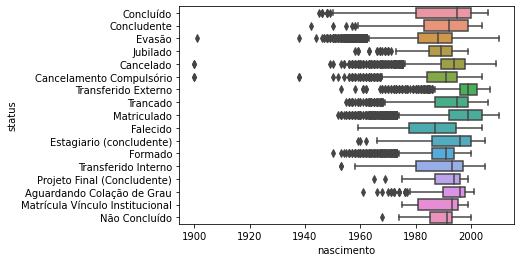

In [81]:
sns.boxplot(df1['nascimento'],df1['status'])

<AxesSubplot:xlabel='status', ylabel='campus'>

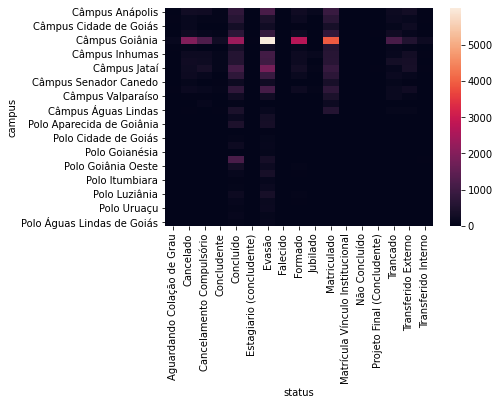

In [85]:
sns.heatmap(pd.crosstab(df['campus'],df['status']))

In [90]:
df

,campus,ano,semestre,curso,tipo_curso,modalidade,sexo,escolaridade,algo,cor,nascimento,status
0,Câmpus Águas Lindas,2014,1,Técnico Integrado ao Ensino Médio em Enfermage...,Integrado - EJA,Presencial,M,Ensino Médio,"1 Sm < Rfp <= 1,5 Sm",Preta,1979,Concluído
1,Câmpus Águas Lindas,2014,1,Técnico Integrado ao Ensino Médio em Enfermage...,Integrado - EJA,Presencial,F,Ensino Médio,"1,5 Sm < Rfp <= 2,5 Sm",Parda,1985,Concludente
2,Câmpus Águas Lindas,2014,1,Técnico Integrado ao Ensino Médio em Enfermage...,Integrado - EJA,Presencial,F,Ensino Médio,"1,5 Sm < Rfp <= 2,5 Sm",Parda,1980,Concluído
3,Câmpus Águas Lindas,2014,1,Técnico Integrado ao Ensino Médio em Enfermage...,Integrado - EJA,Presencial,F,Ensino Médio,Não Informado,Não dispõe da informação,1989,Evasão
4,Câmpus Águas Lindas,2014,1,Técnico Integrado ao Ensino Médio em Enfermage...,Integrado - EJA,Presencial,F,Ensino Médio,"1,5 Sm < Rfp <= 2,5 Sm",Parda,1981,Concluído
...,...,...,...,...,...,...,...,...,...,...,...,...
63630,Polo Valparaíso de Goiás,2015,2,Curso Técnico Subsequente ao Ensino Médio em S...,Subsequente,À Distância,F,Ensino Médio,"0,5 Sm < Rfp <= 1 Sm",Parda,1988,Evasão
63631,Polo Valparaíso de Goiás,2015,2,Curso Técnico Subsequente ao Ensino Médio em S...,Subsequente,À Distância,F,Ensino Médio,"1 Sm < Rfp <= 1,5 Sm",Preta,1988,Evasão
63632,Polo Valparaíso de Goiás,2015,2,Curso Técnico Subsequente ao Ensino Médio em S...,Subsequente,À Distância,M,Ensino Médio,"1 Sm < Rfp <= 1,5 Sm",Parda,1986,Evasão
63633,Polo Valparaíso de Goiás,2015,2,Curso Técnico Subsequente ao Ensino Médio em S...,Subsequente,À Distância,M,Ensino Médio,"0,5 Sm < Rfp <= 1 Sm",Parda,1988,Evasão


,ano,semestre,nascimento,campus_Câmpus Anápolis,campus_Câmpus Aparecida de Goiânia,campus_Câmpus Cidade de Goiás,campus_Câmpus Formosa,campus_Câmpus Goiânia,campus_Câmpus Goiânia Oeste,campus_Câmpus Inhumas,...,status_Falecido,status_Formado,status_Jubilado,status_Matriculado,status_Matrícula Vínculo Institucional,status_Não Concluído,status_Projeto Final (Concludente),status_Trancado,status_Transferido Externo,status_Transferido Interno
6,0.428571,0.5,0.017176,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
292,0.571429,0.5,0.014345,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1397,0.142857,0.5,0.016233,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1412,0.142857,0.5,0.016610,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1426,0.142857,0.5,0.016233,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52876,0.285714,1.0,0.017176,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
53246,0.428571,0.5,0.018498,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
53249,0.428571,0.5,0.018686,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
53285,0.428571,0.5,0.018498,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [93]:
df_posprocessing

,ano,semestre,nascimento,campus_Câmpus Anápolis,campus_Câmpus Aparecida de Goiânia,campus_Câmpus Cidade de Goiás,campus_Câmpus Formosa,campus_Câmpus Goiânia,campus_Câmpus Goiânia Oeste,campus_Câmpus Inhumas,...,status_Falecido,status_Formado,status_Jubilado,status_Matriculado,status_Matrícula Vínculo Institucional,status_Não Concluído,status_Projeto Final (Concludente),status_Trancado,status_Transferido Externo,status_Transferido Interno
0,0.428571,0.5,0.014911,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.428571,0.5,0.016044,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.428571,0.5,0.015100,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.428571,0.5,0.016799,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.428571,0.5,0.015289,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63630,0.500000,1.0,0.016610,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63631,0.500000,1.0,0.016610,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63632,0.500000,1.0,0.016233,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63633,0.500000,1.0,0.016610,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


C:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ano', ylabel='status'>

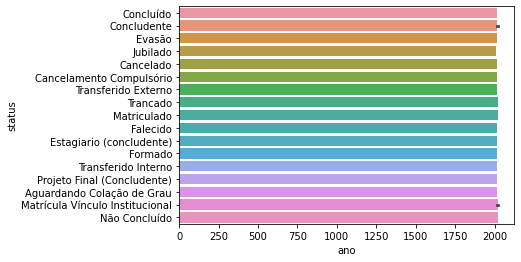

In [109]:
temp = df[df['ano']>=2008]
sns.barplot(temp['ano'],df['status'])

,campus,ano,semestre,curso,tipo_curso,modalidade,sexo,escolaridade,algo,cor,nascimento,status
13073,Câmpus Goiânia,2008,1,Bacharelado em Engenharia de Controle e Automação,Bacharelado,Presencial,M,Superior,"1,5 Sm < Rfp <= 2,5 Sm",Parda,1990,Evasão
13074,Câmpus Goiânia,2008,1,Bacharelado em Engenharia de Controle e Automação,Bacharelado,Presencial,M,Superior,Não Informado,Não dispõe da informação,1990,Cancelado
13075,Câmpus Goiânia,2008,1,Bacharelado em Engenharia de Controle e Automação,Bacharelado,Presencial,M,Superior,Não Informado,Não dispõe da informação,1989,Formado
13076,Câmpus Goiânia,2008,1,Bacharelado em Engenharia de Controle e Automação,Bacharelado,Presencial,M,Superior,Não Informado,Não dispõe da informação,1989,Formado
13077,Câmpus Goiânia,2008,1,Bacharelado em Engenharia de Controle e Automação,Bacharelado,Presencial,M,Superior,Rfp > 3 Sm,Branca,1989,Formado
...,...,...,...,...,...,...,...,...,...,...,...,...
51845,Câmpus Uruaçu,2008,2,Técnico Subsequente ao Ensino Médio em Edifica...,Subsequente,Presencial,M,Ensino Médio,Não Informado,Não dispõe da informação,1983,Evasão
51846,Câmpus Uruaçu,2008,2,Técnico Subsequente ao Ensino Médio em Edifica...,Subsequente,Presencial,F,Ensino Médio,Não Informado,Não dispõe da informação,1989,Concluído
51847,Câmpus Uruaçu,2008,2,Técnico Subsequente ao Ensino Médio em Edifica...,Subsequente,Presencial,M,Ensino Médio,Não Informado,Não dispõe da informação,1981,Concluído
51848,Câmpus Uruaçu,2008,2,Técnico Subsequente ao Ensino Médio em Edifica...,Subsequente,Presencial,M,Ensino Médio,Não Informado,Não dispõe da informação,1990,Evasão


## AULA 3

In [181]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.decomposition import PCA

In [233]:
curso_data = df['curso'].drop_duplicates()
tfidf = TfidfVectorizer()
x_tfidf = tfidf.fit_transform(curso_data)


In [234]:
n_clusters = 22
km = KMeans(n_clusters=n_clusters, random_state=47)
km.fit(x_tfidf)

KMeans(n_clusters=22, random_state=47)

In [235]:
score = silhouette_score(x_tfidf.toarray(), km.labels_)
score

0.13557812608801845

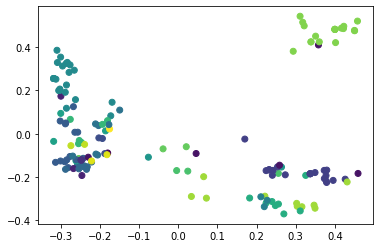

In [236]:
pca = PCA(n_components=2)
pca_x = pca.fit_transform(x_tfidf.toarray())
plt.scatter(pca_x[:,0], pca_x[:, 1], c= km.labels_)
# plt.show()

Text(0.5, 0, 'Z-axis')

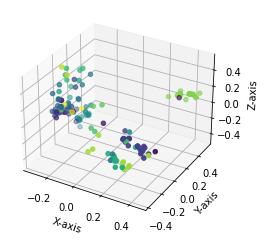

In [237]:
pca = PCA(n_components=3)
pca_x = pca.fit_transform(x_tfidf.toarray())
# Create the figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Generate the values
x_vals = pca_x[:, 0]
y_vals = pca_x[:, 1]
z_vals = pca_x[:, 2]

# Plot the values
ax.scatter(x_vals, y_vals, z_vals, c = km.labels_)
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

# plt.show()


In [238]:
km.labels_

array([17,  4,  4, 15,  7,  2, 10,  4, 11,  4, 13, 17, 18,  7,  4, 17,  6,
       16, 14,  6,  4, 17,  7, 17,  7, 17,  4, 12, 17,  4,  4,  6,  7, 17,
        6,  4,  1,  4, 17, 10,  4,  5,  6, 16,  0, 10, 10, 10, 10, 10, 10,
       10, 10,  2, 10, 10, 10, 11,  4,  4, 18,  4, 17,  4, 15, 18, 18, 18,
       18, 15,  4,  5,  7,  6,  7, 17, 10, 10, 10, 10, 10,  7, 12,  6,  6,
        2,  6,  6,  8, 14,  7, 17, 17,  6,  4,  6,  7, 17,  8,  8, 10, 17,
        8, 18, 12, 12,  7,  4, 21, 20,  1,  1, 10, 14,  6, 18, 18,  4, 17,
        8,  8, 16, 10,  4, 18, 10, 19, 17,  1, 19,  4, 14, 17,  6, 14,  1,
       17,  5,  8, 17,  3,  3,  3, 10,  3, 13, 13, 13, 13, 13, 13, 20, 14,
        9, 13,  9,  9])

In [244]:
results = [[] for i in range(n_clusters)]
data = curso_data.to_numpy()
for i, label in enumerate(km.labels_):
    results[label].append(data[i])
    # print(data[i])

In [246]:
# print(results)
for i, l in enumerate(results):
    print("cluster ", i)
    print(l)

cluster  0
['Intercâmbio Cultural Brasil/alemanha']
cluster  1
['Técnico Integrado ao Ensino Médio em Manutenção e Suporte em Informática na Modalidade de Educação de Jovens e Adultos', 'Bacharelado em Informática', 'Técnico Integrado ao Ensino Médio em Informática', 'Técnico Integrado ao Ensino Médio em Manutenção e Suporte em Informática', 'Técnico Integrado em Manutenção e Suporte em Informática']
cluster  2
['Licenciatura em Química', 'Superior de Tecnologia em Química Agroindustrial', 'Bacharelado em Química']
cluster  3
['Alunos Especiais - Mestrado - Câmpus Goiânia', 'Alunos Especiais - Mestrado - Câmpus Jataí', 'Alunos Especiais - Mestrado - Câmpus Anápolis', 'Alunos Especiais - Mestrado - Câmpus Aparecida']
cluster  4
['Técnico Integrado ao Ensino Médio em Vigilância em Saúde', 'Técnico Integrado ao Ensino Médio em Análises Clínicas', 'Técnico Integrado ao Ensino Médio em Edificações', 'Técnico Integrado ao Ensino Médio em Química', 'Técnico Integrado ao Ensino Médio em Comérc